In [1]:
## A notebook to run an analysis on a kaggle data of patient that didn't show up for their appointment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [2]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
## Rename three of the columns as part of the data cleaning process

df.rename(index=str, columns = {'No-show':'No_show'}, inplace = True)
df.rename(index=str, columns = {'Hipertension':'Hypertension'}, inplace = True)
df.rename(index=str, columns = {'Handcap':'Handicap'}, inplace = True)

In [4]:
## print header to see if the changes I just made took effect

df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
## To show the frequency of the values in the column No_show
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [6]:
## To show the frequency of the values in the column Gender M is for Male, F is for Female
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [7]:
## To show the frequency of the values in the column SMS_received, 0 for those that did not receive, 1 for those that did receive SMS.
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [8]:
## Describe the entities in column Age, mean Age equals 37.
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [9]:
## check for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [10]:
## numbers of duplicates
sum(df.duplicated())

0

In [11]:
## return number of rows and columns
df.shape

(110527, 14)

## Exploratory Data Analysis

In [12]:
# return the numbers of males that received SMS
df_SMS_M = df[(df['SMS_received']==1)&(df['Gender']=='M')]

In [13]:
df_SMS_M.value_counts()

PatientId     AppointmentID  Gender  ScheduledDay          AppointmentDay        Age  Neighbourhood      Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  No_show
5.422400e+07  5613714        M       2016-04-25T09:36:18Z  2016-05-11T00:00:00Z  32   ITARARÉ            0            0             0         0           0         1             No         1
7.228955e+13  5636797        M       2016-04-28T16:07:50Z  2016-05-03T00:00:00Z  45   MARIA ORTIZ        0            0             0         0           0         1             No         1
7.433448e+13  5602289        M       2016-04-19T14:40:54Z  2016-06-07T00:00:00Z  44   RESISTÊNCIA        0            0             0         0           0         1             No         1
7.435735e+13  5588737        M       2016-04-15T10:28:40Z  2016-06-06T00:00:00Z  33   JARDIM CAMBURI     0            0             0         0           0         1             Yes        1
7.437983e+13  5630938        M       2016-04-27T16

In [14]:
# return the numbers of females that received SMS
df_SMS_F = df[(df['SMS_received']==1)&(df['Gender']=='F')]

In [15]:
df_SMS_F.value_counts()

PatientId     AppointmentID  Gender  ScheduledDay          AppointmentDay        Age  Neighbourhood      Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  No_show
5.376153e+05  5637728        F       2016-04-29T07:19:57Z  2016-05-06T00:00:00Z  14   FORTE SÃO JOÃO     0            0             0         0           0         1             No         1
7.178993e+13  5746746        F       2016-05-30T14:29:05Z  2016-06-03T00:00:00Z  48   NOVA PALESTINA     0            1             0         0           0         1             No         1
7.184212e+13  5715446        F       2016-05-18T14:21:13Z  2016-05-25T00:00:00Z  45   ILHA DAS CAIEIRAS  0            0             1         0           0         1             No         1
7.184137e+13  5477527        F       2016-03-16T13:06:45Z  2016-04-29T00:00:00Z  44   CARATOÍRA          0            0             0         0           0         1             No         1
7.183532e+13  5714354        F       2016-05-18T11

In [16]:
## Return numbers of male older than or equal to the mean age 37

df[(df['Age'] >= 37)&(df['Gender']=='M')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
16,8.457439e+13,5633121,M,2016-04-28T08:51:47Z,2016-04-29T00:00:00Z,50,NOVA PALESTINA,0,0,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
28,5.926172e+12,5642400,M,2016-04-29T15:48:02Z,2016-04-29T00:00:00Z,51,SÃO PEDRO,0,0,0,0,0,0,No
32,5.288356e+13,5637908,M,2016-04-29T07:30:27Z,2016-04-29T00:00:00Z,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110488,7.935892e+14,5760379,M,2016-06-01T14:47:12Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No
110490,3.252624e+14,5787975,M,2016-06-08T10:55:45Z,2016-06-08T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,0,No
110495,7.499489e+12,5759838,M,2016-06-01T13:49:47Z,2016-06-01T00:00:00Z,40,MARIA ORTIZ,0,0,0,0,0,0,No
110497,7.935892e+14,5757745,M,2016-06-01T09:46:33Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No


In [17]:
#Return numbers of females older than or equal to the mean age 37

df[(df['Age'] >= 37)&(df['Gender']=='F')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [18]:
## Return numbers of males less than the mean age 37

df[(df['Age'] < 37)&(df['Gender']=='M')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
31,3.112849e+11,5628907,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
35,7.816264e+13,5637968,M,2016-04-29T07:34:42Z,2016-04-29T00:00:00Z,18,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110493,1.712135e+11,5788054,M,2016-06-08T11:06:40Z,2016-06-08T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,0,No
110506,8.973883e+11,5758779,M,2016-06-01T11:09:20Z,2016-06-01T00:00:00Z,5,MARIA ORTIZ,0,0,0,0,0,0,No
110509,4.952968e+14,5786750,M,2016-06-08T08:50:51Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,2016-06-08T07:52:55Z,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No


In [19]:
## Return numbers of females less than the mean age 37

df[(df['Age'] < 37)&(df['Gender']=='F')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110507,4.769462e+14,5786918,F,2016-06-08T09:04:18Z,2016-06-08T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
110511,8.235996e+11,5786742,F,2016-06-08T08:50:20Z,2016-06-08T00:00:00Z,14,MARIA ORTIZ,0,0,0,0,0,0,No
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No


In [20]:
#Return numbers of males older than or equal to 50 years old

df[(df['Age'] >= 50)&(df['Gender']=='M')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
16,8.457439e+13,5633121,M,2016-04-28T08:51:47Z,2016-04-29T00:00:00Z,50,NOVA PALESTINA,0,0,0,0,0,0,No
28,5.926172e+12,5642400,M,2016-04-29T15:48:02Z,2016-04-29T00:00:00Z,51,SÃO PEDRO,0,0,0,0,0,0,No
32,5.288356e+13,5637908,M,2016-04-29T07:30:27Z,2016-04-29T00:00:00Z,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
38,5.873316e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110455,7.214919e+14,5772215,M,2016-06-03T14:53:55Z,2016-06-03T00:00:00Z,52,RESISTÊNCIA,0,0,0,0,1,0,No
110465,6.846652e+12,5768917,M,2016-06-03T08:10:22Z,2016-06-03T00:00:00Z,51,RESISTÊNCIA,0,0,0,0,0,0,No
110488,7.935892e+14,5760379,M,2016-06-01T14:47:12Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No
110490,3.252624e+14,5787975,M,2016-06-08T10:55:45Z,2016-06-08T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,0,No


In [21]:
#Return numbers of females older than or equal to 50 years old

df[(df['Age'] >= 50)&(df['Gender']=='F')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No


In [22]:
## Return numbers of males that received SMS and age greater than or equal the mean age

df[(df['SMS_received']==1)&(df['Age'] >= 37)&(df['Gender']=='M')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
38,5.873316e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
46,1.379437e+11,5615608,M,2016-04-25T12:44:36Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No
79,9.912882e+13,5597673,M,2016-04-18T17:53:25Z,2016-04-29T00:00:00Z,67,MARIA ORTIZ,0,0,0,0,0,1,Yes
80,1.486715e+12,5597685,M,2016-04-18T18:03:12Z,2016-04-29T00:00:00Z,68,JABOUR,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110401,9.291759e+12,5640506,M,2016-04-29T10:51:13Z,2016-06-07T00:00:00Z,39,SANTOS REIS,0,0,0,0,0,1,Yes
110402,5.387257e+13,5674212,M,2016-05-09T10:37:11Z,2016-06-07T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,0,1,Yes
110425,2.558640e+14,5695130,M,2016-05-13T09:35:56Z,2016-06-08T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,0,1,No
110433,5.529917e+13,5627262,M,2016-04-27T09:15:08Z,2016-06-01T00:00:00Z,63,RESISTÊNCIA,0,0,1,0,0,1,No


In [23]:
## Return number of females that received SMS and age greater than or equal the mean age

df[(df['SMS_received']==1)&(df['Age'] >= 37)&(df['Gender']=='F')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
33,7.653517e+12,5616921,F,2016-04-25T15:01:04Z,2016-04-29T00:00:00Z,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
48,8.545415e+12,5618643,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
68,5.434176e+12,5552915,F,2016-04-06T18:00:29Z,2016-04-29T00:00:00Z,69,JARDIM DA PENHA,0,1,0,0,0,1,No
69,7.938214e+11,5552917,F,2016-04-06T18:00:51Z,2016-04-29T00:00:00Z,58,SANTO ANDRÉ,0,0,0,0,0,1,No
73,4.542132e+13,5552934,F,2016-04-06T18:12:38Z,2016-04-29T00:00:00Z,68,REPÚBLICA,0,1,1,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [24]:
## Return number of males that received SMS and age less than the mean age

df[(df['SMS_received']==1)&(df['Age'] < 37)&(df['Gender']=='M')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
56,4.751189e+14,5600005,M,2016-04-19T09:47:43Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,0,0,0,0,0,1,Yes
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
78,6.259265e+11,5597672,M,2016-04-18T17:52:49Z,2016-04-29T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110426,9.691376e+09,5740289,M,2016-05-25T15:00:52Z,2016-06-08T00:00:00Z,13,RESISTÊNCIA,1,0,0,0,0,1,No
110431,2.175329e+12,5769362,M,2016-06-03T08:45:25Z,2016-06-08T00:00:00Z,12,RESISTÊNCIA,0,0,0,0,0,1,Yes
110435,3.421400e+13,5768610,M,2016-06-03T07:48:03Z,2016-06-08T00:00:00Z,8,RESISTÊNCIA,0,0,0,0,0,1,No
110442,7.167947e+13,5703900,M,2016-05-16T14:41:52Z,2016-06-06T00:00:00Z,8,RESISTÊNCIA,0,0,0,0,0,1,Yes


In [25]:
## Return number of females that received SMS and age less than the mean age

df[(df['SMS_received']==1)&(df['Age'] < 37)&(df['Gender']=='F')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
49,9.223559e+13,5534656,F,2016-03-31T17:11:17Z,2016-04-29T00:00:00Z,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes
50,1.827172e+14,5534661,F,2016-03-31T17:12:45Z,2016-04-29T00:00:00Z,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes
51,4.694699e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110478,5.478497e+12,5671780,F,2016-05-09T07:11:08Z,2016-06-06T00:00:00Z,27,RESISTÊNCIA,0,0,0,0,0,1,No
110479,4.455244e+12,5638153,F,2016-04-29T07:45:43Z,2016-06-06T00:00:00Z,34,RESISTÊNCIA,1,0,0,0,0,1,Yes
110481,4.383634e+11,5685319,F,2016-05-11T10:08:44Z,2016-06-06T00:00:00Z,28,RESISTÊNCIA,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No


In [26]:
## Of the 88208 people that showed up, the amount that are male are retuned by the expression below.

df[(df['Gender'] == 'M') & (df['No_show'] == 'No')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No
16,8.457439e+13,5633121,M,2016-04-28T08:51:47Z,2016-04-29T00:00:00Z,50,NOVA PALESTINA,0,0,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
28,5.926172e+12,5642400,M,2016-04-29T15:48:02Z,2016-04-29T00:00:00Z,51,SÃO PEDRO,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110497,7.935892e+14,5757745,M,2016-06-01T09:46:33Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No
110501,4.544252e+11,5758133,M,2016-06-01T10:19:12Z,2016-06-01T00:00:00Z,44,MARIA ORTIZ,0,0,0,0,0,0,No
110506,8.973883e+11,5758779,M,2016-06-01T11:09:20Z,2016-06-01T00:00:00Z,5,MARIA ORTIZ,0,0,0,0,0,0,No
110509,4.952968e+14,5786750,M,2016-06-08T08:50:51Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,0,0,0,0,0,No


In [46]:
## Of the 88208 people that showed up, the amount that are male and above or equal to the average age are retuned by the expression below.

df[(df['Gender'] == 'M') &(df['Age'] >= 37) & (df['No_show'] == 'No')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
16,8.457439e+13,5633121,M,2016-04-28T08:51:47Z,2016-04-29T00:00:00Z,50,NOVA PALESTINA,0,0,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
28,5.926172e+12,5642400,M,2016-04-29T15:48:02Z,2016-04-29T00:00:00Z,51,SÃO PEDRO,0,0,0,0,0,0,No
32,5.288356e+13,5637908,M,2016-04-29T07:30:27Z,2016-04-29T00:00:00Z,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110488,7.935892e+14,5760379,M,2016-06-01T14:47:12Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No
110490,3.252624e+14,5787975,M,2016-06-08T10:55:45Z,2016-06-08T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,0,No
110495,7.499489e+12,5759838,M,2016-06-01T13:49:47Z,2016-06-01T00:00:00Z,40,MARIA ORTIZ,0,0,0,0,0,0,No
110497,7.935892e+14,5757745,M,2016-06-01T09:46:33Z,2016-06-01T00:00:00Z,76,MARIA ORTIZ,0,0,0,0,0,0,No


In [49]:
## Of the 88208 people that showed up, the amount that are male and less than average age are retuned by the expression below.

df[(df['Gender'] == 'M') &(df['Age'] < 37) & (df['No_show'] == 'No')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No
35,7.816264e+13,5637968,M,2016-04-29T07:34:42Z,2016-04-29T00:00:00Z,18,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
53,4.438587e+14,5637909,M,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,6,CONQUISTA,0,0,0,0,0,0,No
55,4.179932e+13,5638018,M,2016-04-29T07:37:45Z,2016-04-29T00:00:00Z,2,NOVA PALESTINA,0,0,0,0,0,0,No
57,3.996740e+12,5638466,M,2016-04-29T08:03:51Z,2016-04-29T00:00:00Z,11,CONQUISTA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110487,1.891645e+12,5786423,M,2016-06-08T08:24:51Z,2016-06-08T00:00:00Z,20,MARIA ORTIZ,0,0,0,0,0,0,No
110493,1.712135e+11,5788054,M,2016-06-08T11:06:40Z,2016-06-08T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,0,No
110506,8.973883e+11,5758779,M,2016-06-01T11:09:20Z,2016-06-01T00:00:00Z,5,MARIA ORTIZ,0,0,0,0,0,0,No
110509,4.952968e+14,5786750,M,2016-06-08T08:50:51Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,0,0,0,0,0,No


In [27]:
## Of the 88208 people that showed up, the amount that are female are retuned by the expression below.
df[(df['Gender'] == 'F') & (df['No_show'] == 'No')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [47]:
## Of the 88208 people that showed up, the amount that are female and above or equal to the average age are retuned by the expression below.

df[(df['Gender'] == 'F') &(df['Age'] >= 37) & (df['No_show'] == 'No')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [48]:
## Of the 88208 people that showed up, the amount that are female and less than average age are retuned by the expression below.

df[(df['Gender'] == 'F') &(df['Age'] < 37) & (df['No_show'] == 'No')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110507,4.769462e+14,5786918,F,2016-06-08T09:04:18Z,2016-06-08T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
110511,8.235996e+11,5786742,F,2016-06-08T08:50:20Z,2016-06-08T00:00:00Z,14,MARIA ORTIZ,0,0,0,0,0,0,No
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No


# Draw Conclusion

In [34]:
## Returns number of male that did not show up
df[(df['Gender'] == 'M') & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
31,3.112849e+11,5628907,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
56,4.751189e+14,5600005,M,2016-04-19T09:47:43Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,0,0,0,0,0,1,Yes
76,6.549277e+12,5597643,M,2016-04-18T17:40:18Z,2016-04-29T00:00:00Z,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110415,6.717885e+13,5658645,M,2016-05-04T11:29:17Z,2016-06-06T00:00:00Z,59,RESISTÊNCIA,0,0,0,0,0,0,Yes
110431,2.175329e+12,5769362,M,2016-06-03T08:45:25Z,2016-06-08T00:00:00Z,12,RESISTÊNCIA,0,0,0,0,0,1,Yes
110442,7.167947e+13,5703900,M,2016-05-16T14:41:52Z,2016-06-06T00:00:00Z,8,RESISTÊNCIA,0,0,0,0,0,1,Yes
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [35]:
## Returns number of female that did not show up
df[(df['Gender'] == 'F') & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
21,1.215484e+13,5628338,F,2016-04-27T10:50:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110479,4.455244e+12,5638153,F,2016-04-29T07:45:43Z,2016-06-06T00:00:00Z,34,RESISTÊNCIA,1,0,0,0,0,1,Yes
110482,5.944225e+14,5639147,F,2016-04-29T08:45:44Z,2016-06-06T00:00:00Z,43,RESISTÊNCIA,1,0,0,0,0,1,Yes
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [36]:
## Return the numbers of male that received SMS, but did not show up
df[(df['Gender'] == 'M') & (df['SMS_received']==1) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
56,4.751189e+14,5600005,M,2016-04-19T09:47:43Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,0,0,0,0,0,1,Yes
79,9.912882e+13,5597673,M,2016-04-18T17:53:25Z,2016-04-29T00:00:00Z,67,MARIA ORTIZ,0,0,0,0,0,1,Yes
90,8.782530e+14,5595362,M,2016-04-18T12:33:05Z,2016-04-29T00:00:00Z,11,JUCUTUQUARA,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110392,9.844342e+14,5746278,M,2016-05-30T13:43:24Z,2016-06-07T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,0,1,Yes
110401,9.291759e+12,5640506,M,2016-04-29T10:51:13Z,2016-06-07T00:00:00Z,39,SANTOS REIS,0,0,0,0,0,1,Yes
110402,5.387257e+13,5674212,M,2016-05-09T10:37:11Z,2016-06-07T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,0,1,Yes
110431,2.175329e+12,5769362,M,2016-06-03T08:45:25Z,2016-06-08T00:00:00Z,12,RESISTÊNCIA,0,0,0,0,0,1,Yes


In [37]:
## Return the numbers of female that received SMS, but did not show up
df[(df['Gender'] == 'F') & (df['SMS_received']==1) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
48,8.545415e+12,5618643,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
49,9.223559e+13,5534656,F,2016-03-31T17:11:17Z,2016-04-29T00:00:00Z,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes
50,1.827172e+14,5534661,F,2016-03-31T17:12:45Z,2016-04-29T00:00:00Z,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes
51,4.694699e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
52,7.987570e+14,5534639,F,2016-03-31T17:06:17Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110461,3.346245e+12,5628114,F,2016-04-27T10:29:36Z,2016-06-03T00:00:00Z,13,RESISTÊNCIA,0,0,0,0,0,1,Yes
110469,8.322564e+14,5656075,F,2016-05-04T07:35:31Z,2016-06-07T00:00:00Z,51,RESISTÊNCIA,0,0,0,0,0,1,Yes
110470,4.125933e+12,5692391,F,2016-05-12T15:12:01Z,2016-06-02T00:00:00Z,26,RESISTÊNCIA,0,0,0,0,0,1,Yes
110479,4.455244e+12,5638153,F,2016-04-29T07:45:43Z,2016-06-06T00:00:00Z,34,RESISTÊNCIA,1,0,0,0,0,1,Yes


In [28]:
## Return the numbers of males that receieved SMS, and above or equal to the average age but did not show up

df[(df['Gender'] == 'M') & (df['SMS_received']==1) & (df['Age'] >= 37) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
79,9.912882e+13,5597673,M,2016-04-18T17:53:25Z,2016-04-29T00:00:00Z,67,MARIA ORTIZ,0,0,0,0,0,1,Yes
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
336,2.817719e+13,5490381,M,2016-03-18T14:47:16Z,2016-04-29T00:00:00Z,51,TABUAZEIRO,0,0,0,0,0,1,Yes
534,4.541492e+12,5488182,M,2016-03-18T09:52:31Z,2016-04-29T00:00:00Z,53,ITARARÉ,0,0,0,0,0,1,Yes
537,3.546481e+13,5590085,M,2016-04-15T13:33:58Z,2016-04-29T00:00:00Z,58,ITARARÉ,0,1,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110261,6.467297e+14,5663750,M,2016-05-05T10:30:21Z,2016-06-07T00:00:00Z,55,GOIABEIRAS,0,0,0,0,0,1,Yes
110371,2.558640e+14,5655443,M,2016-05-03T17:14:58Z,2016-06-01T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,0,1,Yes
110392,9.844342e+14,5746278,M,2016-05-30T13:43:24Z,2016-06-07T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,0,1,Yes
110401,9.291759e+12,5640506,M,2016-04-29T10:51:13Z,2016-06-07T00:00:00Z,39,SANTOS REIS,0,0,0,0,0,1,Yes


In [29]:
## Return the numbers of females that receieved SMS, and above or equal to the average age but did not show up

df[(df['Gender'] == 'F') & (df['SMS_received']==1) & (df['Age'] >= 37) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
48,8.545415e+12,5618643,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
161,2.541248e+14,5543795,F,2016-04-05T10:37:03Z,2016-04-29T00:00:00Z,38,BONFIM,0,0,0,0,0,1,Yes
166,9.666857e+12,5557543,F,2016-04-07T14:38:22Z,2016-04-29T00:00:00Z,42,BONFIM,1,0,0,0,0,1,Yes
270,8.617228e+12,5620528,F,2016-04-26T09:08:53Z,2016-04-29T00:00:00Z,45,CARATOÍRA,1,1,0,0,0,1,Yes
272,5.119616e+12,5594085,F,2016-04-18T10:12:57Z,2016-04-29T00:00:00Z,51,NOVA PALESTINA,0,1,0,0,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110363,2.123885e+14,5624922,F,2016-04-26T17:48:28Z,2016-06-02T00:00:00Z,54,RESISTÊNCIA,0,1,0,0,0,1,Yes
110386,2.957279e+12,5582576,F,2016-04-14T09:37:34Z,2016-06-01T00:00:00Z,48,RESISTÊNCIA,0,1,0,0,0,1,Yes
110420,2.934141e+12,5574038,F,2016-04-12T14:01:07Z,2016-06-06T00:00:00Z,41,RESISTÊNCIA,0,0,0,0,0,1,Yes
110469,8.322564e+14,5656075,F,2016-05-04T07:35:31Z,2016-06-07T00:00:00Z,51,RESISTÊNCIA,0,0,0,0,0,1,Yes


In [30]:
## Return the numbers of males that receieved SMS, and above or equal to 50 years but did not show up

df[(df['Gender'] == 'M') & (df['SMS_received']==1) & (df['Age'] >= 50) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
79,9.912882e+13,5597673,M,2016-04-18T17:53:25Z,2016-04-29T00:00:00Z,67,MARIA ORTIZ,0,0,0,0,0,1,Yes
336,2.817719e+13,5490381,M,2016-03-18T14:47:16Z,2016-04-29T00:00:00Z,51,TABUAZEIRO,0,0,0,0,0,1,Yes
534,4.541492e+12,5488182,M,2016-03-18T09:52:31Z,2016-04-29T00:00:00Z,53,ITARARÉ,0,0,0,0,0,1,Yes
537,3.546481e+13,5590085,M,2016-04-15T13:33:58Z,2016-04-29T00:00:00Z,58,ITARARÉ,0,1,0,0,0,1,Yes
914,1.899995e+13,5525204,M,2016-03-30T08:47:21Z,2016-04-29T00:00:00Z,64,MARIA ORTIZ,0,1,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109777,7.117382e+10,5768290,M,2016-06-03T07:28:38Z,2016-06-07T00:00:00Z,80,PRAIA DO SUÁ,0,1,1,0,1,1,Yes
109838,5.289178e+12,5769488,M,2016-06-03T08:53:01Z,2016-06-07T00:00:00Z,68,JARDIM CAMBURI,0,0,0,0,0,1,Yes
109956,3.651334e+13,5768070,M,2016-06-03T07:18:48Z,2016-06-07T00:00:00Z,94,CARATOÍRA,0,1,1,0,0,1,Yes
110020,5.126293e+13,5770753,M,2016-06-03T10:54:31Z,2016-06-07T00:00:00Z,72,PARQUE MOSCOSO,0,0,0,0,0,1,Yes


In [31]:
## Return the numbers of males that receieved SMS, and above or equal to 50 years but did not show up

df[(df['Gender'] == 'F') & (df['SMS_received']==1) & (df['Age'] >= 50) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
48,8.545415e+12,5618643,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
272,5.119616e+12,5594085,F,2016-04-18T10:12:57Z,2016-04-29T00:00:00Z,51,NOVA PALESTINA,0,1,0,0,1,1,Yes
352,5.917359e+12,5494413,F,2016-03-21T10:01:59Z,2016-04-29T00:00:00Z,62,SÃO CRISTÓVÃO,0,1,0,0,0,1,Yes
446,2.449424e+10,5562707,F,2016-04-08T14:13:23Z,2016-04-29T00:00:00Z,60,JARDIM CAMBURI,0,0,0,0,0,1,Yes
576,7.382561e+12,5612780,F,2016-04-25T08:39:33Z,2016-04-29T00:00:00Z,62,BENTO FERREIRA,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110237,6.986486e+12,5714283,F,2016-05-18T11:39:51Z,2016-06-01T00:00:00Z,66,MARIA ORTIZ,0,0,0,0,0,1,Yes
110280,8.178626e+14,5624722,F,2016-04-26T16:48:46Z,2016-06-01T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,1,Yes
110350,9.434693e+13,5510680,F,2016-03-28T07:11:14Z,2016-06-01T00:00:00Z,50,RESISTÊNCIA,0,0,0,0,0,1,Yes
110363,2.123885e+14,5624922,F,2016-04-26T17:48:28Z,2016-06-02T00:00:00Z,54,RESISTÊNCIA,0,1,0,0,0,1,Yes


In [32]:
## Return the numbers of males that receieved SMS, and are less than the average age but did not show up

df[(df['Gender'] == 'M') & (df['SMS_received']==1) & (df['Age'] < 37) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
56,4.751189e+14,5600005,M,2016-04-19T09:47:43Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,0,0,0,0,0,1,Yes
90,8.782530e+14,5595362,M,2016-04-18T12:33:05Z,2016-04-29T00:00:00Z,11,JUCUTUQUARA,0,0,0,0,0,1,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110300,4.994689e+13,5753782,M,2016-05-31T14:47:38Z,2016-06-07T00:00:00Z,22,RESISTÊNCIA,0,0,0,0,0,1,Yes
110339,3.731746e+12,5584042,M,2016-04-14T13:01:21Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,1,Yes
110373,3.334786e+11,5655438,M,2016-05-03T17:14:35Z,2016-06-01T00:00:00Z,8,RESISTÊNCIA,0,0,0,0,0,1,Yes
110431,2.175329e+12,5769362,M,2016-06-03T08:45:25Z,2016-06-08T00:00:00Z,12,RESISTÊNCIA,0,0,0,0,0,1,Yes


In [33]:
## Return the numbers of females that receieved SMS, and are less than the average age but did not show up

df[(df['Gender'] == 'F') & (df['SMS_received']==1) & (df['Age'] < 37) & (df['No_show'] == 'Yes')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
49,9.223559e+13,5534656,F,2016-03-31T17:11:17Z,2016-04-29T00:00:00Z,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes
50,1.827172e+14,5534661,F,2016-03-31T17:12:45Z,2016-04-29T00:00:00Z,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes
51,4.694699e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
52,7.987570e+14,5534639,F,2016-03-31T17:06:17Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
107,7.954396e+12,5608249,F,2016-04-20T13:30:12Z,2016-04-29T00:00:00Z,26,SANTO ANTÔNIO,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110432,1.269372e+12,5769371,F,2016-06-03T08:45:57Z,2016-06-08T00:00:00Z,34,RESISTÊNCIA,0,0,0,0,0,1,Yes
110449,2.911460e+14,5749879,F,2016-05-31T08:19:23Z,2016-06-06T00:00:00Z,12,RESISTÊNCIA,0,0,0,0,0,1,Yes
110461,3.346245e+12,5628114,F,2016-04-27T10:29:36Z,2016-06-03T00:00:00Z,13,RESISTÊNCIA,0,0,0,0,0,1,Yes
110470,4.125933e+12,5692391,F,2016-05-12T15:12:01Z,2016-06-02T00:00:00Z,26,RESISTÊNCIA,0,0,0,0,0,1,Yes


## People that show up or not in relation to their neighbourhood

In [38]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [39]:
df['Neighbourhood'].nunique()

81

In [40]:
df['Neighbourhood'].describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object

In [41]:
## Returns the neigbourhood where most male that showed up came from i.e, Neighbourhood with the highest frequency
df_NE_M = df[(df['Gender'] == 'M') & (df['No_show'] == 'No')] 
df_NE_M['Neighbourhood'].mode()

0    JARDIM CAMBURI
Name: Neighbourhood, dtype: object

In [42]:
## Returns the neigbourhood where most female that showed up came from i.e, Neighbourhood with the highest frequency
df_NE_F = df[(df['Gender'] == 'F') & (df['No_show'] == 'No')] 
df_NE_F['Neighbourhood'].mode()

0    JARDIM CAMBURI
Name: Neighbourhood, dtype: object

In [44]:
## Returns the neigbourhood where most male that did not show up came from i.e, Neighbourhood with the highest frequency
df_NE_MN = df[(df['Gender'] == 'M') & (df['No_show'] == 'Yes')] 
df_NE_MN['Neighbourhood'].mode()

0    JARDIM CAMBURI
Name: Neighbourhood, dtype: object

In [45]:
## Returns the neigbourhood where most female that did not show up came from i.e, Neighbourhood with the highest frequency
df_NE_FN = df[(df['Gender'] == 'F') & (df['No_show'] == 'Yes')] 
df_NE_FN['Neighbourhood'].mode()

0    JARDIM CAMBURI
Name: Neighbourhood, dtype: object

In [50]:
## Returns the neigbourhood where the least amount of male that showed up came from i.e, Neighbourhood with the least frequency
df_NE_M['Neighbourhood'].min()

'ANDORINHAS'

In [51]:
## Returns the neigbourhood where the least amount of female that showed up came from i.e, Neighbourhood with the least frequency
df_NE_F['Neighbourhood'].min()

'AEROPORTO'

In [52]:
## Return the neighbourhood where the number of male that did not show up is at it lowest.
df_NE_MN['Neighbourhood'].min()

'ANDORINHAS'

In [53]:
## Return the neighbourhood where the number of female that did not show up is at it lowest.
df_NE_FN['Neighbourhood'].min()

'AEROPORTO'

# OBSERVATIONS 

### Male below the average age of 37 showed up for their appointment more than their male counterpart that are 37 years and above.

### Female that are 37 years and above showed up for their appointment than their counterpart below the average age. 

### About 27.2 percent of the male, and about 27.8 percent of female that received SMS did not show up for their appointment.

### 80percent of both Male and Female showed up for their appointment.

### About 40 percent of the Male, and about 44.48 percent of the Female that did not show up are older than or equal to the average age of 37.

### About 24 percent of the male, and about 26 percent of the female that did not show up are older than 50 years old.

### More males and females that showed up are from 'Jardim Camburi' neighbourhood.

### More males and females that did not show up are also from 'Jardim Camburi' neighbourhood.

### Few male came from 'ANDORINHAS' neighbourhood.

### Few female came from 'AEROPORTO' neighbourhood.



## Visualization

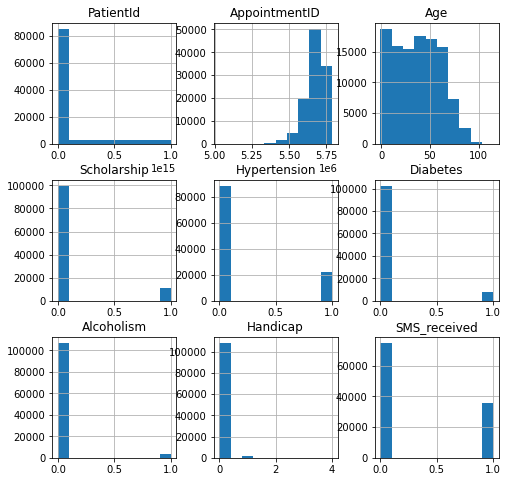

In [54]:
df.hist(figsize= (8,8));

<AxesSubplot:>

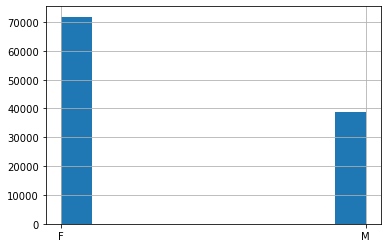

In [55]:
## Histogram showing the record of male and female patient
df['Gender'].hist()


<AxesSubplot:>

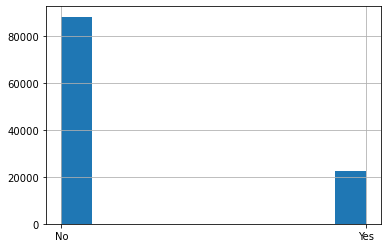

In [56]:
## Histogram showing the record of No_show, for male and female respectively.
df['No_show'].hist()

In [57]:
df.to_csv('noshowappointments-kagglev2-updated.csv', index=False)